In [202]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,power_transform
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
  

In [203]:
import pandas as pd
df_test=pd.read_csv(r"C:\Users\anand\Downloads\Project-Housing--2---1---1- (1)\Project-Housing_splitted\test.csv")

## test dataframe

In [204]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal


In [205]:
df_test.shape

(292, 80)

In [206]:
df_test.sample(8)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
221,144,20,RL,78.0,10335,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
210,242,30,RM,40.0,3880,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
258,633,20,RL,85.0,11900,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,Family
124,1428,50,RL,60.0,10930,Pave,Grvl,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal
35,574,80,RL,76.0,9967,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2007,WD,Normal
211,1198,75,RM,65.0,8850,Pave,NaN,IR1,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,ConLw,Normal
191,1204,20,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal
189,215,60,RL,NaN,10900,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,450,3,2010,WD,Normal


## check duplicates:

In [207]:
df_test.duplicated().sum()

0

## check null values:

In [208]:
df_test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64

In [209]:
df_test.isnull().sum().sum()

1407

In [210]:
df=df_test

In [211]:
df.shape

(292, 80)

In [212]:
df.shape

(292, 80)

## train dataframe

In [213]:
df_train=pd.read_csv(r"C:\Users\anand\Downloads\Project-Housing--2---1---1- (1)\Project-Housing_splitted\train.csv")

In [214]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [215]:
df2=df_train

## check duplicates:

In [216]:
df2.duplicated().sum().sum()

0

##### no duplicates are present

## check null values:

In [217]:
df2.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [218]:
df2.isnull().sum().sum()

5558

In [219]:
print("Shape")
print("Training data : ", df.shape)
print("Test data     : ", df2.shape)

Shape
Training data :  (292, 80)
Test data     :  (1168, 81)


In [220]:
s = (df2.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

s = (df2.dtypes == 'int')
num_cols = list(s[s].index)
print("Integer variables:")
print(num_cols)

s = (df2.dtypes == 'float')
num_cols = list(s[s].index)
print("Real variables:")
print(num_cols)

Categorical variables:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Integer variables:
[]
Real variables:
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


In [221]:
f_desc = open(r"C:\Users\anand\Downloads\Project-Housing--2---1---1- (1)\Project-Housing_splitted\Data Description.txt")
print(f_desc.read())
f_desc.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## Missing Values:
Combine training and test data into a single dataframe

In [222]:
df = [df2,df]
df_combined = pd.concat(df).reset_index(drop=True)

In [223]:
df_combined

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2008,WD,Normal,NaN
1456,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,NaN
1457,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,NaN
1458,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,NaN


In [224]:
df_combined.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice        292
Length: 81, dtype: int64

<AxesSubplot:title={'center':'Heatmap of missing values'}>

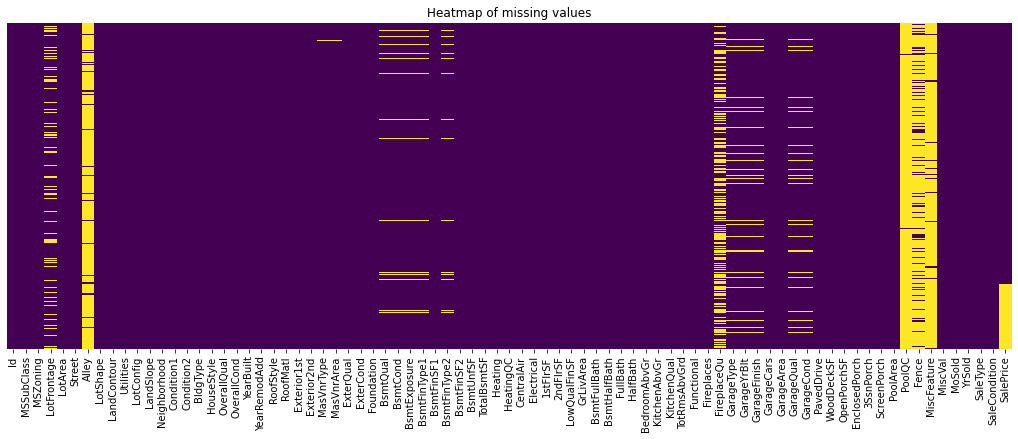

In [225]:
plt.figure(figsize=(18,6))
plt.title('Heatmap of missing values')
sns.heatmap(df_combined.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## visualisation:

<AxesSubplot:title={'center':'No. Unique values of Categorical Features'}>

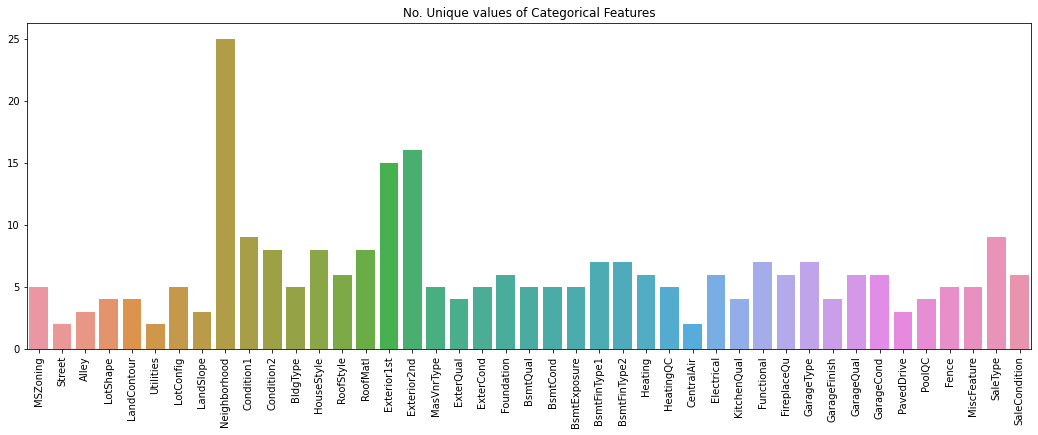

In [226]:
unique_values = []
for col in object_cols:
    unique_values.append(df_combined[col].unique().size)
plt.figure(figsize=(18,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

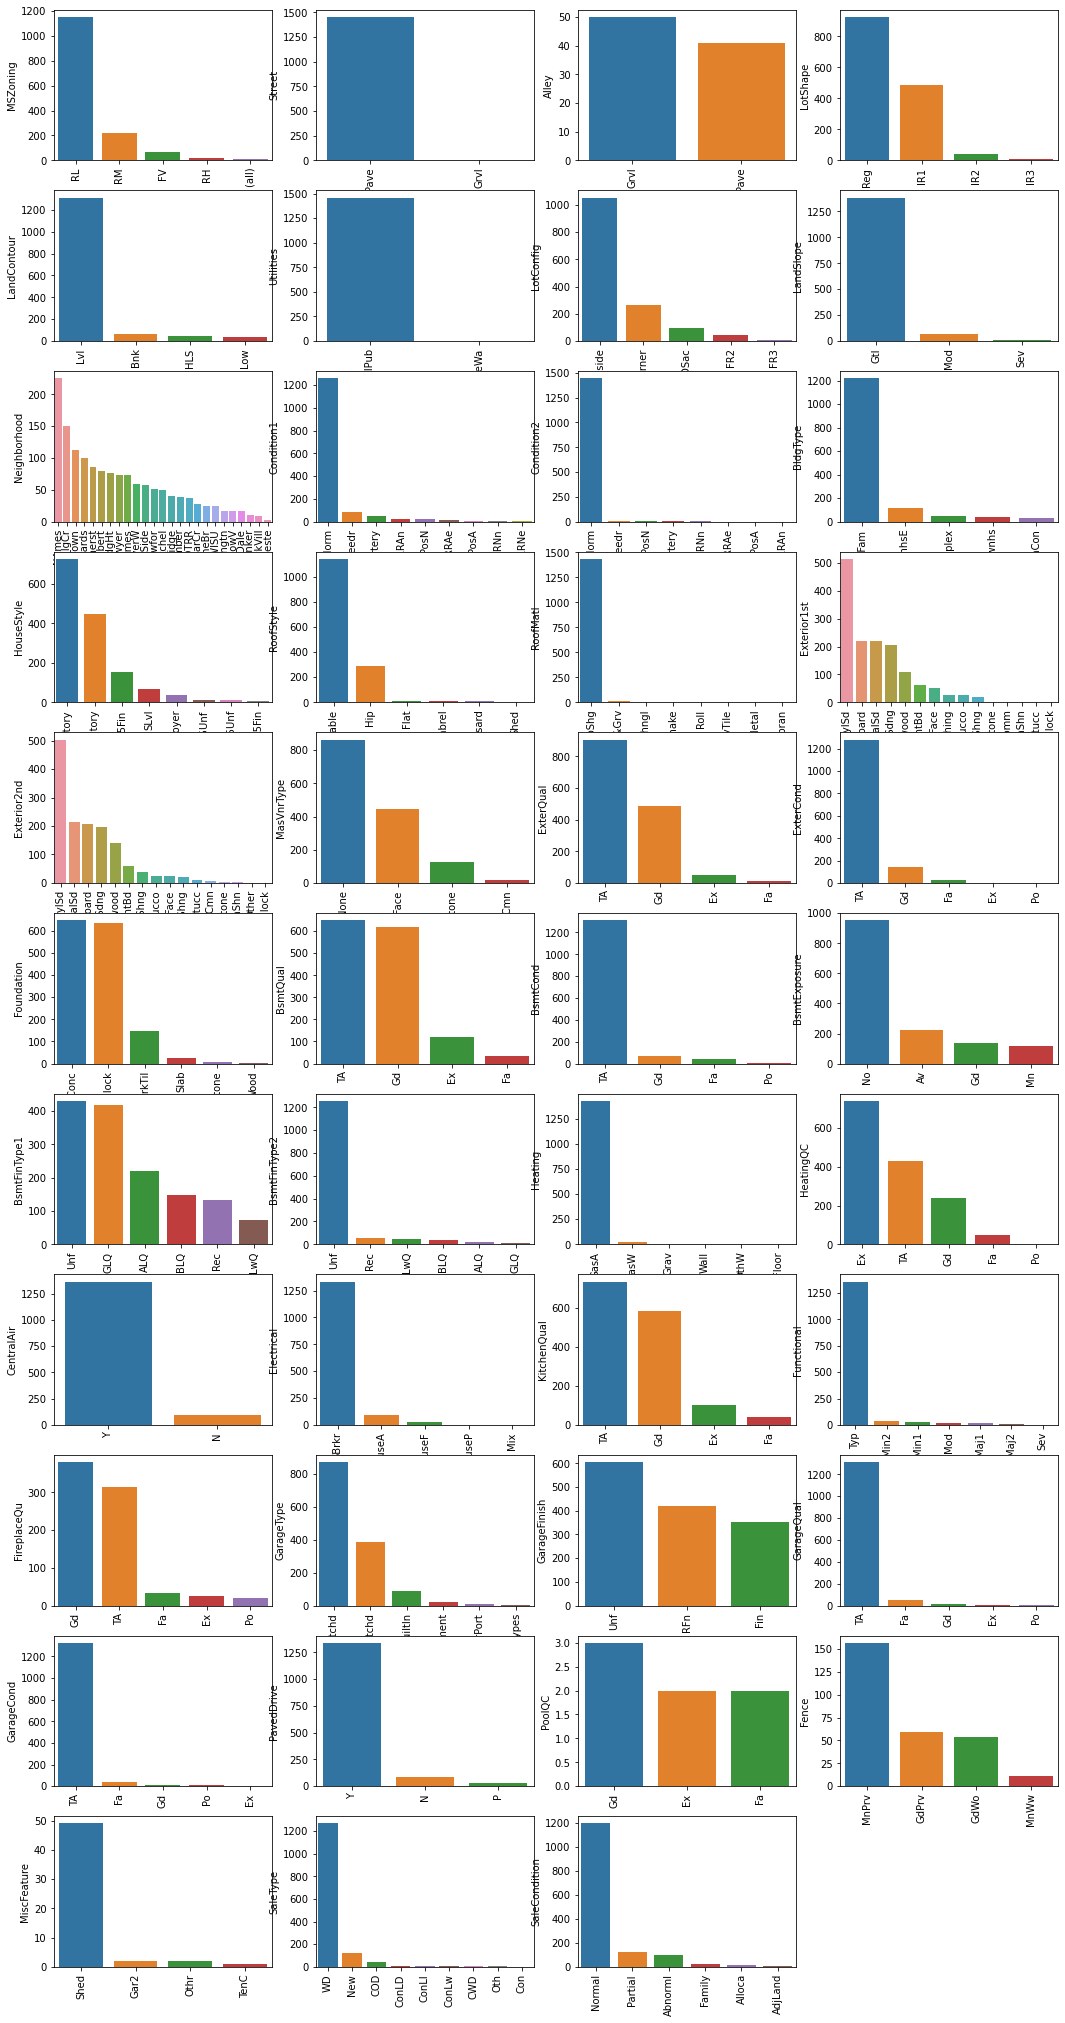

In [227]:
plt.figure(figsize=(18,36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
for col in object_cols:
    y = df_combined[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index +=1

### fill nan:
Drop the features 'Alley', 'Fence', and 'MiscFeature'.

Drop 'Utilities' feature, as all but one have the value 'AllPub'

All entries with missing 'FirePlaceQu' have 'Fireplaces' = 0. Hence fill missing values with 'NA'.

All but one entries with missing 'PoolQC' value have 'PoolArea' = 0. Use mode for missing value with non-zero PoolArea. Use 'NA' for the rest of the entries.

Basement features: Fill missing values with 'NA' or '0'.

Garage features: Fill missing values with 'NA' or '0'.

Remaining Integer and Real features: fill up missing values with mean of the corresponding feature.

Remaining Categorical features: fill up missing values with mode of the corresponding feature.

## imputation:

In [228]:
df_combined.drop(columns='Id',inplace=True)
df_combined['MSZoning'] = df_combined['MSZoning'].fillna(df_combined['MSZoning'].mode()[0])
df_combined['LotFrontage'] = df_combined['LotFrontage'].fillna(df_combined['LotFrontage'].mean())
df_combined.drop(columns='Alley',inplace=True)

#df_combined['Utilities'] = df_combined['Utilities'].fillna(df_combined['Utilities'].mode()[0])
print(df_combined['Utilities'].value_counts())
df_combined.drop(columns='Utilities',inplace=True)

df_combined['Exterior1st'] = df_combined['Exterior1st'].fillna(df_combined['Exterior1st'].mode()[0])
df_combined['Exterior2nd'] = df_combined['Exterior2nd'].fillna(df_combined['Exterior2nd'].mode()[0])
df_combined['MasVnrType'] = df_combined['MasVnrType'].fillna(df_combined['MasVnrType'].mode()[0])
df_combined['MasVnrArea'] = df_combined['MasVnrArea'].fillna(df_combined['MasVnrArea'].mean())
df_combined['Electrical'] = df_combined['Electrical'].fillna(df_combined['Electrical'].mode()[0])
df_combined['KitchenQual'] = df_combined['KitchenQual'].fillna(df_combined['KitchenQual'].mode()[0])
df_combined['Functional'] = df_combined['Functional'].fillna(df_combined['Functional'].mode()[0])

#df_combined.loc[(df_combined['Fireplaces'] != 0) & (df_combined['FireplaceQu'].isnull()) ][['FireplaceQu','Fireplaces']]
df_combined['FireplaceQu'] = df_combined['FireplaceQu'].fillna('NA')
df_combined.loc[(df_combined['PoolQC'].isnull()) & df_combined['PoolArea']>0][['PoolQC','PoolArea']]
df_combined.at[2599,'PoolQC'] = df_combined['PoolQC'].mode()[0]
df_combined['PoolQC'] = df_combined['PoolQC'].fillna('NA')

df_combined['SaleType'].fillna(df_combined['SaleType'].mode()[0],inplace=True)
df_combined.drop(columns=['Fence','MiscFeature','SalePrice'],inplace=True)

df_combined['BsmtQual'] = df_combined['BsmtQual'].fillna('NA')
df_combined['BsmtCond'] = df_combined['BsmtCond'].fillna('NA')
df_combined['BsmtExposure'] = df_combined['BsmtExposure'].fillna('NA')
df_combined['BsmtFinType1'] = df_combined['BsmtFinType1'].fillna('NA')
df_combined['BsmtFinType2'] = df_combined['BsmtFinType2'].fillna('NA')

df_combined['BsmtFinSF1'] = df_combined['BsmtFinSF1'].fillna(int(0))
df_combined['BsmtFinSF2'] = df_combined['BsmtFinSF2'].fillna(int(0))
df_combined['BsmtUnfSF'] = df_combined['BsmtUnfSF'].fillna(int(0))
df_combined['TotalBsmtSF'] = df_combined['TotalBsmtSF'].fillna(int(0))
df_combined['BsmtFullBath'] = df_combined['BsmtFullBath'].fillna(int(0))
df_combined['BsmtHalfBath'] = df_combined['BsmtHalfBath'].fillna(int(0))


df_combined['GarageType'] = df_combined['GarageType'].fillna('NA')
df_combined['GarageFinish'] = df_combined['GarageFinish'].fillna('NA')
df_combined['GarageCond'] = df_combined['GarageCond'].fillna('NA')
df_combined['GarageQual'] = df_combined['GarageQual'].fillna('NA')
df_combined['GarageCars'] = df_combined['GarageCars'].fillna(int(0))
df_combined['GarageArea'] = df_combined['GarageArea'].fillna(int(0))
df_combined['GarageYrBlt'] = df_combined['GarageYrBlt'].fillna(int(0))

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


In [230]:
df_combined.isnull().sum().sum()

55

In [231]:
df3=df_combined.dropna(axis=0)

In [232]:
df3.shape

(1460, 75)

## data processing:

In [233]:
from sklearn.preprocessing import OneHotEncoder

In [234]:
s = (df3.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',len(object_cols))

Categorical variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'SaleType', 'SaleCondition']
No. of. categorical features:  39


In [235]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df3[object_cols]))
OH_cols.index = df3.index
OH_cols.columns = OH_encoder.get_feature_names()
df_final = df3.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [236]:
df_final.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,x37_ConLw,x37_New,x37_Oth,x37_WD,x38_Abnorml,x38_AdjLand,x38_Alloca,x38_Family,x38_Normal,x38_Partial
0,120.0,70.049958,4928.0,6.0,5.0,1976.0,1976.0,0.0,120.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20.0,95.000000,15865.0,8.0,6.0,1970.0,1970.0,0.0,351.0,823.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60.0,92.000000,9920.0,7.0,5.0,1996.0,1997.0,0.0,862.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,20.0,105.000000,11751.0,6.0,6.0,1977.0,1977.0,480.0,705.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,20.0,70.049958,16635.0,6.0,7.0,1977.0,2000.0,126.0,1246.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [244]:
print('df_final shape:', df_final.shape)
print('df_train shape:', df_train.shape)
print('df_test shape:',  df_test.shape)

x_train = pd.DataFrame(df_final[:1168])
x_test  = pd.DataFrame(df_final[1168:])
y_train = df_train['SalePrice']

print('\nCheck that the datasets are consistent:\n')
print('x_train shape', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:',  x_test.shape)

df_final shape: (1460, 287)
df_train shape: (1168, 81)
df_test shape: (292, 80)

Check that the datasets are consistent:

x_train shape (1168, 287)
y_train shape: (1168,)
x_test shape: (292, 287)


In [245]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, train_size=0.8, test_size=0.2,random_state=0)

## model building:

In [247]:
from sklearn.metrics import mean_absolute_error

In [248]:
from sklearn.ensemble import GradientBoostingRegressor

model_GBR = GradientBoostingRegressor()
model_GBR.fit(x_train, y_train)
y_pred = model_GBR.predict(x_valid)
print(mean_absolute_error(y_valid, y_pred))

15680.038879453248


In [250]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor()
model_RFR.fit(x_train, y_train)
y_pred = model_RFR.predict(x_valid)
print(mean_absolute_error(y_valid, y_pred))

17369.781794871797


In [252]:
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)


AdaBoostRegressor()

In [253]:
y_pred=ada.predict(x_valid)
y_pred.shape

(234,)

In [255]:
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
import sklearn.metrics as metrics
accuracy=metrics.r2_score(y_valid,y_pred)
print('R square score',accuracy)

R square score 0.8283931577717751


In [256]:
print(mean_absolute_error(y_valid, y_pred))

25971.074459239157


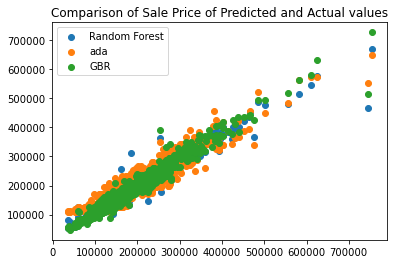

In [257]:
plt.figure()
plt.title('Comparison of Sale Price of Predicted and Actual values')
plt.scatter(Y_Train,model_RFR.predict(X_Train),label='Random Forest')
plt.scatter(Y_Train,ada.predict(X_Train),label='ada')
plt.scatter(Y_Train,model_GBR.predict(X_Train),label='GBR')

plt.legend()

In [283]:
y_pred 

array([127732.08163265, 169284.4260355 , 160574.19827586, 224658.41764706,
       165919.5497076 , 127001.44827586, 160574.19827586, 226951.41176471,
       193228.4017094 , 131008.60777385, 214846.11940299, 223564.72307692,
       173742.05263158, 127732.08163265, 136852.02380952, 242186.39772727,
       195094.12941176, 243891.24170616, 128059.08783784, 127001.44827586,
       127001.44827586, 123179.1570997 , 222927.94160584, 184983.33333333,
       127001.44827586, 224658.41764706, 122265.44615385, 127732.08163265,
       169232.28571429, 243880.84084084, 344231.52      , 243880.84084084,
       248563.18548387, 157382.40540541, 278555.77653631, 167846.22121212,
       113871.66304348, 123179.1570997 , 224525.05759162, 173742.05263158,
       261614.03020134, 128059.08783784, 122265.44615385, 164834.85393258,
       136717.18487395, 221329.5112782 , 217431.7421875 , 196399.61309524,
       180523.44166667, 124734.47583643, 160574.19827586, 127001.44827586,
       224525.05759162, 1

In [284]:
y_pred.shape

(234,)


    this should be a predicted price.

### conclusion :
    ada boost classifier shows best fitted model ,its accuracy score is 82%